In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder

In [ ]:
data = pd.read_csv("Dry_Bean_Dataset.csv")

In [ ]:
X = data.iloc[:,:-1]

In [ ]:
Y = data.iloc[:,16]

In [ ]:
en = LabelEncoder()
en_y = en.fit_transform(Y)

F_y = tf.keras.utils.to_categorical(en_y)

In [ ]:
seed = 7
np.random.seed(seed)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,F_y,test_size=0.30,random_state=seed,stratify=en_y,shuffle=True)

In [ ]:
st = StandardScaler()
st_xtrain = st.fit_transform(x_train)
st_xtest = st.fit_transform(x_test)

In [ ]:
mmx = tf.keras.models.Sequential()
mmx.add(tf.keras.layers.Dense(87, input_dim=16, activation=tf.nn.relu))
mmx.add(tf.keras.layers.Dense(77, activation=tf.nn.relu))
mmx.add(tf.keras.layers.BatchNormalization())
mmx.add(tf.keras.layers.Dropout(0.2))
mmx.add(tf.keras.layers.Dense(65, activation=tf.nn.relu))
mmx.add(tf.keras.layers.Dense(63, activation=tf.nn.relu))
mmx.add(tf.keras.layers.BatchNormalization())
mmx.add(tf.keras.layers.Dropout(0.2))
mmx.add(tf.keras.layers.Dense(59, activation=tf.nn.relu))
mmx.add(tf.keras.layers.Dense(57, activation=tf.nn.relu))
mmx.add(tf.keras.layers.BatchNormalization())
mmx.add(tf.keras.layers.Dropout(0.2))
mmx.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
mmx.add(tf.keras.layers.Dense(21, activation=tf.nn.relu))
mmx.add(tf.keras.layers.BatchNormalization())
mmx.add(tf.keras.layers.Dropout(0.2))
mmx.add(tf.keras.layers.Dense(16, activation=tf.nn.relu))
mmx.add(tf.keras.layers.Dense(13, activation=tf.nn.relu))
mmx.add(tf.keras.layers.Dense(11, activation=tf.nn.relu))
mmx.add(tf.keras.layers.Dense(7, activation=tf.nn.softmax))

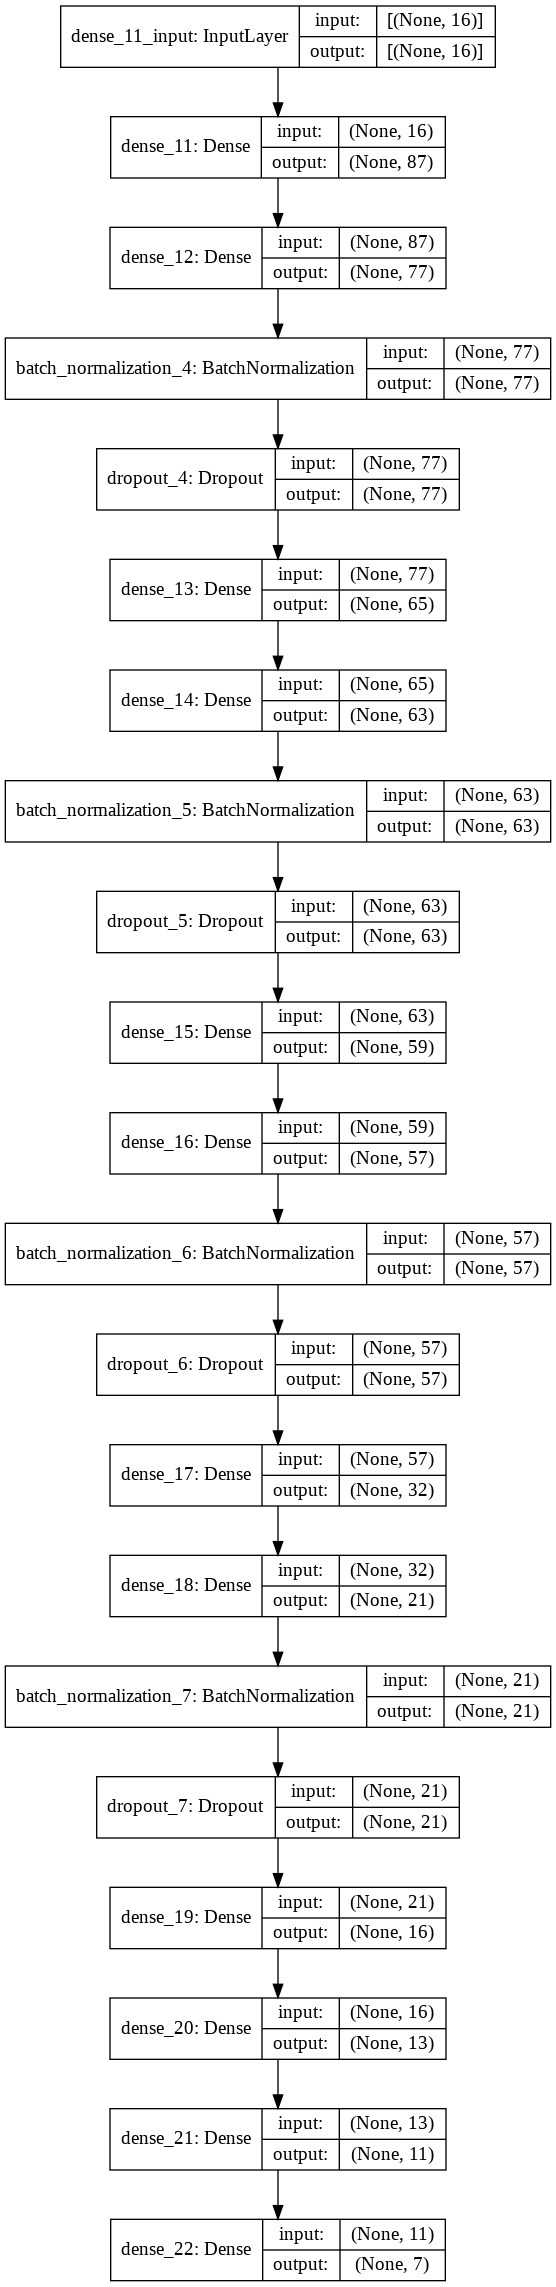

In [ ]:
tf.keras.utils.plot_model(mmx,show_shapes=True)

In [ ]:
mmx.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = mmx.fit(st_xtrain, y_train,validation_data=(st_xtest,y_test),epochs=400, batch_size=7)

Epoch 1/400
1361/1361 [==============================] - 5s 3ms/step - loss: 1.5319 - accuracy: 0.3945 - val_loss: 0.5005 - val_accuracy: 0.8406
Epoch 2/400
1361/1361 [==============================] - 4s 3ms/step - loss: 0.7713 - accuracy: 0.7274 - val_loss: 0.2970 - val_accuracy: 0.9172
Epoch 3/400
1361/1361 [==============================] - 4s 3ms/step - loss: 0.6076 - accuracy: 0.7982 - val_loss: 0.2740 - val_accuracy: 0.9167
Epoch 4/400
1361/1361 [==============================] - 4s 3ms/step - loss: 0.5437 - accuracy: 0.8205 - val_loss: 0.2807 - val_accuracy: 0.9180
Epoch 5/400
1361/1361 [==============================] - 4s 3ms/step - loss: 0.5162 - accuracy: 0.8354 - val_loss: 0.2689 - val_accuracy: 0.9143
Epoch 6/400
1361/1361 [==============================] - 4s 3ms/step - loss: 0.4707 - accuracy: 0.8456 - val_loss: 0.2843 - val_accuracy: 0.9109
Epoch 7/400
1361/1361 [==============================] - 4s 3ms/step - loss: 0.4613 - accuracy: 0.8480 - val_loss: 0.2468 - val_ac

In [ ]:
mmx.evaluate(st_xtest,y_test)

128/128 [==============================] - 0s 1ms/step - loss: 0.2103 - accuracy: 0.9344


[0.21028949320316315, 0.9343780875205994]

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


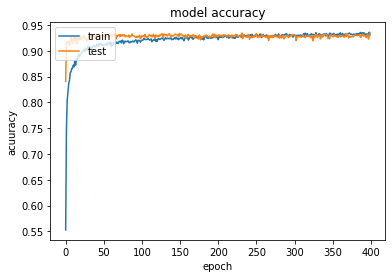

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acuuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

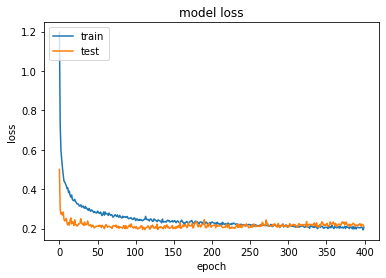

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictions = mmx.predict(st_xtest)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_test.argmax(axis=1),predictions.argmax(axis=1))

In [ ]:
import seaborn as sns

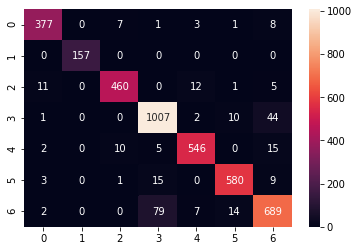

In [ ]:
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       397
           1       1.00      1.00      1.00       157
           2       0.96      0.94      0.95       489
           3       0.91      0.95      0.93      1064
           4       0.96      0.94      0.95       578
           5       0.96      0.95      0.96       608
           6       0.89      0.87      0.88       791

    accuracy                           0.93      4084
   macro avg       0.95      0.94      0.95      4084
weighted avg       0.93      0.93      0.93      4084

